In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib
import datetime as dt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from keras import optimizers
from matplotlib import pyplot
from keras.layers import Dropout
import tensorflow as tf
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras.layers import LeakyReLU
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from pandas.tseries.offsets import *


Using TensorFlow backend.
C:\Users\yasha\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yasha\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yasha\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yasha\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df = pd.read_csv("nyc_energy_consumption.csv")


In [3]:
df = df.dropna() #dropped na values

In [4]:
df.isnull().sum()

timeStamp    0
demand       0
precip       0
temp         0
dtype: int64

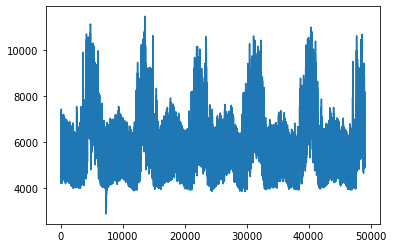

In [5]:
df['demand'].plot()

In [6]:
from scipy import stats #removing outliers
import numpy as np

def Outlier(DataFrame):
    SalesArray = DataFrame['demand'].values
    SalesArray = SalesArray.astype(float)

    Zscores = stats.zscore(SalesArray)
    z = np.abs(Zscores)

    threshold = 3
    Outliers = np.where(z > 3)

    Outliers = list(Outliers[0])
    return Outliers 



In [7]:
Outliers = Outlier(df)

In [8]:
len(Outliers)

412

In [9]:
df.drop(df.index[Outliers],inplace=True)
df

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.500,0.0000,46.13
1,2012-01-01 01:00:00,4752.100,0.0000,45.89
2,2012-01-01 02:00:00,4542.600,0.0000,45.04
3,2012-01-01 03:00:00,4357.700,0.0000,45.03
4,2012-01-01 04:00:00,4275.500,0.0000,42.61
...,...,...,...,...
49119,2017-08-10 01:00:00,5714.258,0.0213,71.06
49120,2017-08-10 02:00:00,5497.025,0.0068,71.21
49121,2017-08-10 03:00:00,5360.583,0.0070,70.39
49122,2017-08-10 04:00:00,5333.775,0.0030,69.18


In [10]:
df

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.500,0.0000,46.13
1,2012-01-01 01:00:00,4752.100,0.0000,45.89
2,2012-01-01 02:00:00,4542.600,0.0000,45.04
3,2012-01-01 03:00:00,4357.700,0.0000,45.03
4,2012-01-01 04:00:00,4275.500,0.0000,42.61
...,...,...,...,...
49119,2017-08-10 01:00:00,5714.258,0.0213,71.06
49120,2017-08-10 02:00:00,5497.025,0.0068,71.21
49121,2017-08-10 03:00:00,5360.583,0.0070,70.39
49122,2017-08-10 04:00:00,5333.775,0.0030,69.18


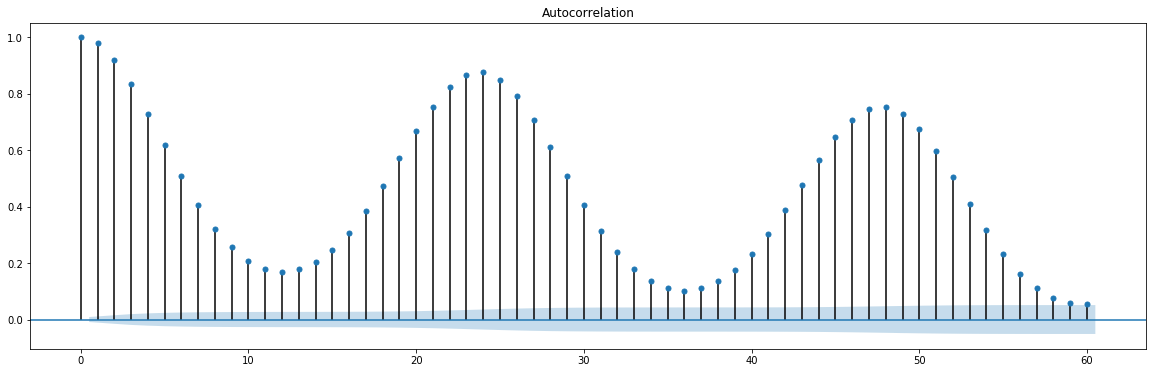

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
N, M = 20, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(df['demand'],lags=60, ax=ax)
pyplot.show()

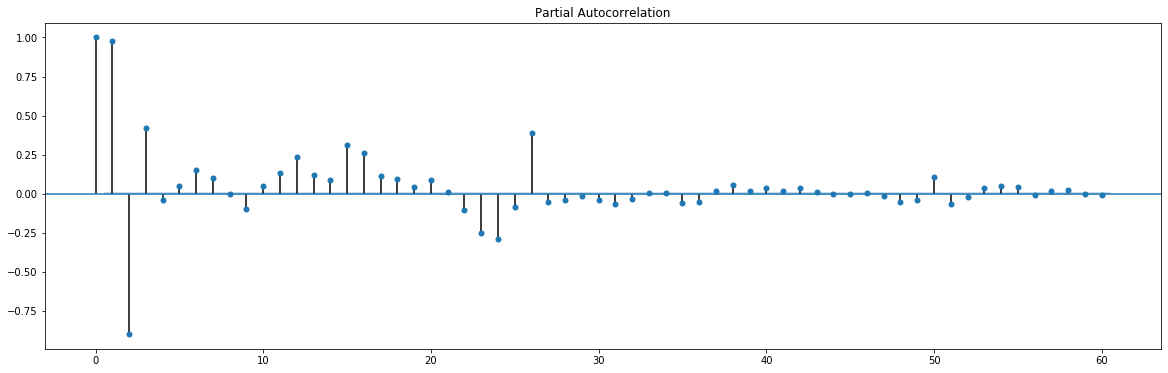

In [12]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
N, M = 20, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(df['demand'], lags=60,ax=ax)
pyplot.show()

In [13]:
df = df.reset_index()
del df['index']
df





,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.500,0.0000,46.13
1,2012-01-01 01:00:00,4752.100,0.0000,45.89
2,2012-01-01 02:00:00,4542.600,0.0000,45.04
3,2012-01-01 03:00:00,4357.700,0.0000,45.03
4,2012-01-01 04:00:00,4275.500,0.0000,42.61
...,...,...,...,...
48477,2017-08-10 01:00:00,5714.258,0.0213,71.06
48478,2017-08-10 02:00:00,5497.025,0.0068,71.21
48479,2017-08-10 03:00:00,5360.583,0.0070,70.39
48480,2017-08-10 04:00:00,5333.775,0.0030,69.18


In [26]:
df = df.sort_values('timeStamp')
df

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.500,0.0000,46.13
1,2012-01-01 01:00:00,4752.100,0.0000,45.89
2,2012-01-01 02:00:00,4542.600,0.0000,45.04
3,2012-01-01 03:00:00,4357.700,0.0000,45.03
4,2012-01-01 04:00:00,4275.500,0.0000,42.61
...,...,...,...,...
48477,2017-08-10 01:00:00,5714.258,0.0213,71.06
48478,2017-08-10 02:00:00,5497.025,0.0068,71.21
48479,2017-08-10 03:00:00,5360.583,0.0070,70.39
48480,2017-08-10 04:00:00,5333.775,0.0030,69.18


In [28]:

data_demand = df.demand.values
data_demand = data_demand.reshape(len(data_demand),1)
data_precip = df.precip.values
data_precip = data_precip.reshape(len(data_precip),1)
data_temp= df.temp.values
data_temp = data_temp.reshape(len(data_temp),1)


#normalized using minmax scaler 

scaler1 = MinMaxScaler(feature_range=(0, 1))
data_demand_normalize = scaler1.fit_transform(data_demand)
scaler2 = MinMaxScaler(feature_range=(0, 1))
data_temp_normalize = scaler2.fit_transform(data_temp)

data_normalize = np.concatenate((data_demand_normalize,data_precip,data_temp_normalize),axis=1)

In [29]:
from numpy import array #
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    #print(len(sequences))
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
		# gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix -1,:], sequences[end_ix -1,0]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [30]:
x, y = split_sequences(data_normalize,6)

In [31]:
x.shape

(48477, 5, 3)

In [32]:
xt = x[:48000,:,:]
yt = y[:48000]
xv = x[48000:,:,:]
yv=y[48000:]

n_features = x.shape[2]


In [33]:
from keras.layers import Flatten
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


In [34]:
batch = 15
lr = 0.0001


In [35]:
model = Sequential()

model = Sequential()
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(5,n_features)))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 3, 64)             640       
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 64)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 3,941
Trainable params: 3,941
Non-trainable params: 0
____________________________________________________

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

Train...
Train on 48000 samples, validate on 477 samples
Epoch 1/50
48000/48000 [==============================] - 7s 150us/step - loss: 0.0044 - val_loss: 0.0048
Epoch 2/50
48000/48000 [==============================] - 6s 123us/step - loss: 0.0028 - val_loss: 0.0056
Epoch 3/50
48000/48000 [==============================] - 5s 106us/step - loss: 0.0025 - val_loss: 0.0050
Epoch 4/50
48000/48000 [==============================] - 5s 105us/step - loss: 0.0024 - val_loss: 0.0053
Epoch 5/50
48000/48000 [==============================] - 5s 108us/step - loss: 0.0023 - val_loss: 0.0047
Epoch 6/50
48000/48000 [==============================] - 5s 107us/step - loss: 0.0022 - val_loss: 0.0054
Epoch 7/50
48000/48000 [==============================] - 5s 106us/step - loss: 0.0022 - val_loss: 0.0053
Epoch 8/50
48000/48000 [==============================] - 5s 113us/step - loss: 0.0020 - val_loss: 0.0050
Epoch 9/50
48000/48000 [==============================] - 5s 103us/step - loss: 0.0020 - val_lo

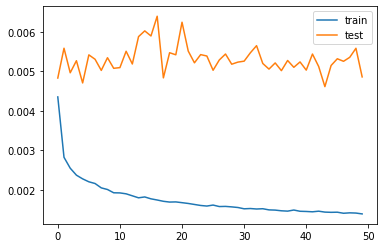

In [37]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=50, verbose=1, mode='auto', restore_best_weights=True)
print('Train...')

#history = model.fit(xt,yt,validation_data=(xv,yv),callbacks=[monitor],verbose=2,epochs=10)
history = model.fit(xt, yt,validation_data=(xv, yv),epochs=50,batch_size = batch,verbose=1,shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [38]:
df

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.500,0.0000,46.13
1,2012-01-01 01:00:00,4752.100,0.0000,45.89
2,2012-01-01 02:00:00,4542.600,0.0000,45.04
3,2012-01-01 03:00:00,4357.700,0.0000,45.03
4,2012-01-01 04:00:00,4275.500,0.0000,42.61
...,...,...,...,...
48477,2017-08-10 01:00:00,5714.258,0.0213,71.06
48478,2017-08-10 02:00:00,5497.025,0.0068,71.21
48479,2017-08-10 03:00:00,5360.583,0.0070,70.39
48480,2017-08-10 04:00:00,5333.775,0.0030,69.18


In [39]:
xforecaste = pd.DataFrame(data=df.iloc[48462:],columns = df.columns)
xforecaste #remainig 20 data has been set for forecasting

,timeStamp,demand,precip,temp
48462,2017-08-09 10:00:00,7348.917,0.0000,74.92
48463,2017-08-09 11:00:00,7516.775,0.0000,78.04
48464,2017-08-09 12:00:00,7671.625,0.0000,80.18
48465,2017-08-09 13:00:00,7806.833,0.0000,82.01
48466,2017-08-09 14:00:00,7949.467,0.0000,82.85
48467,2017-08-09 15:00:00,8065.808,0.0000,84.61
48468,2017-08-09 16:00:00,8162.875,0.0000,84.20
48469,2017-08-09 17:00:00,8136.758,0.0000,84.04
48470,2017-08-09 18:00:00,7852.642,0.0000,82.86
48471,2017-08-09 19:00:00,7535.067,0.0000,79.66


In [40]:
len(xforecaste)

20

In [41]:
data_demand_forecaste = xforecaste.demand.values
data_demand_forecaste = data_demand_forecaste.reshape(len(data_demand_forecaste),1)
data_precip_forecaste = xforecaste.precip.values
data_precip_forecaste = data_precip_forecaste.reshape(len(data_precip_forecaste),1)
data_temp_forecaste= xforecaste.temp.values
data_temp_forecaste = data_temp_forecaste.reshape(len(data_temp_forecaste),1)


# normalized using minmax scaler 

scaler_1 = MinMaxScaler(feature_range=(0, 1))
data_demand_normalize_forecaste = scaler_1.fit_transform(data_demand_forecaste)
scaler_2 = MinMaxScaler(feature_range=(0, 1))
data_temp_normalize_forecaste = scaler_2.fit_transform(data_temp_forecaste)

#All of the normalized data plus features are concatenated together 

data_normalize_forecaste = np.concatenate((data_demand_normalize_forecaste,data_precip_forecaste,data_temp_normalize_forecaste),axis=1)

In [42]:
data_normalize_forecaste

array([[0.71229083, 0.        , 0.41343826],
       [0.77162348, 0.        , 0.60230024],
       [0.82635821, 0.        , 0.73184019],
       [0.87415008, 0.        , 0.84261501],
       [0.92456682, 0.        , 0.89346247],
       [0.9656898 , 0.        , 1.        ],
       [1.        , 0.        , 0.9751816 ],
       [0.99076844, 0.        , 0.96549637],
       [0.89034216, 0.        , 0.8940678 ],
       [0.77808914, 0.        , 0.7003632 ],
       [0.71652045, 0.        , 0.49576271],
       [0.6623336 , 0.5815    , 0.33353511],
       [0.55985119, 0.0448    , 0.25242131],
       [0.40785656, 0.4814    , 0.18220339],
       [0.25438585, 0.003     , 0.20702179],
       [0.13448906, 0.0213    , 0.17978208],
       [0.05770386, 0.0068    , 0.18886199],
       [0.00947581, 0.007     , 0.13922518],
       [0.        , 0.003     , 0.06598063],
       [0.07101481, 0.        , 0.        ]])

In [43]:
ArrayForForecaste = pd.DataFrame(data=data_normalize_forecaste)
ArrayForForecaste

,0,1,2
0,0.712291,0.0000,0.413438
1,0.771623,0.0000,0.602300
2,0.826358,0.0000,0.731840
3,0.874150,0.0000,0.842615
4,0.924567,0.0000,0.893462
5,0.965690,0.0000,1.000000
6,1.000000,0.0000,0.975182
7,0.990768,0.0000,0.965496
8,0.890342,0.0000,0.894068
9,0.778089,0.0000,0.700363


In [44]:
startIndex = 0  #code to forecast the next value on the basis of previous 5 values
endIndex =  5
predicted_values = []
for i in range(15):
    array = ArrayForForecaste.iloc[startIndex:endIndex,:].to_numpy()
    array = np.asarray(array).astype(np.float32)
    
    array = array.reshape(1,len(array),3)
    
    
    yhat = model.predict(array)
    
    zeros = np.zeros((1,1),dtype=int)
    
    yhat = np.append(yhat,zeros,axis =1)
    
    #yhat = scaler_1.inverse
    yhat = scaler_1.inverse_transform(data_demand_normalize_forecaste)
    
    
    predicted_values.append(yhat)
    print(yhat)
    startIndex = startIndex + 1
    endIndex = endIndex + 1 

[[7348.917]
 [7516.775]
 [7671.625]
 [7806.833]
 [7949.467]
 [8065.808]
 [8162.875]
 [8136.758]
 [7852.642]
 [7535.067]
 [7360.883]
 [7207.583]
 [6917.65 ]
 [6487.642]
 [6053.458]
 [5714.258]
 [5497.025]
 [5360.583]
 [5333.775]
 [5534.683]]
[[7348.917]
 [7516.775]
 [7671.625]
 [7806.833]
 [7949.467]
 [8065.808]
 [8162.875]
 [8136.758]
 [7852.642]
 [7535.067]
 [7360.883]
 [7207.583]
 [6917.65 ]
 [6487.642]
 [6053.458]
 [5714.258]
 [5497.025]
 [5360.583]
 [5333.775]
 [5534.683]]
[[7348.917]
 [7516.775]
 [7671.625]
 [7806.833]
 [7949.467]
 [8065.808]
 [8162.875]
 [8136.758]
 [7852.642]
 [7535.067]
 [7360.883]
 [7207.583]
 [6917.65 ]
 [6487.642]
 [6053.458]
 [5714.258]
 [5497.025]
 [5360.583]
 [5333.775]
 [5534.683]]
[[7348.917]
 [7516.775]
 [7671.625]
 [7806.833]
 [7949.467]
 [8065.808]
 [8162.875]
 [8136.758]
 [7852.642]
 [7535.067]
 [7360.883]
 [7207.583]
 [6917.65 ]
 [6487.642]
 [6053.458]
 [5714.258]
 [5497.025]
 [5360.583]
 [5333.775]
 [5534.683]]
[[7348.917]
 [7516.775]
 [7671.625]


In [45]:
df

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.500,0.0000,46.13
1,2012-01-01 01:00:00,4752.100,0.0000,45.89
2,2012-01-01 02:00:00,4542.600,0.0000,45.04
3,2012-01-01 03:00:00,4357.700,0.0000,45.03
4,2012-01-01 04:00:00,4275.500,0.0000,42.61
...,...,...,...,...
48477,2017-08-10 01:00:00,5714.258,0.0213,71.06
48478,2017-08-10 02:00:00,5497.025,0.0068,71.21
48479,2017-08-10 03:00:00,5360.583,0.0070,70.39
48480,2017-08-10 04:00:00,5333.775,0.0030,69.18


In [46]:
#df.id=pd.to_numeric(pf.id)
#pf.age=pd.to_numeric(pf.age)

#df.iloc[48462:,0:1].plot()


In [47]:
myarray_real = df.iloc[48467:,1:2].values
myarray_real = myarray_real.reshape(15)

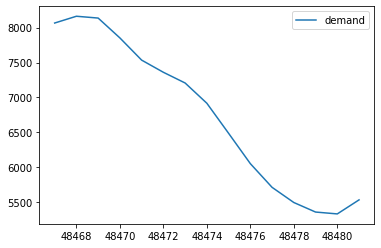

In [48]:
df.iloc[48467:,1:2].plot()

In [49]:
x = pd.DataFrame()
x['actual'] = myarray_real
x['forecasted'] = predicted_values

In [52]:
x['forecasted'] 

0     [[7348.9169999999995], [7516.775], [7671.625],...
1     [[7348.9169999999995], [7516.775], [7671.625],...
2     [[7348.9169999999995], [7516.775], [7671.625],...
3     [[7348.9169999999995], [7516.775], [7671.625],...
4     [[7348.9169999999995], [7516.775], [7671.625],...
5     [[7348.9169999999995], [7516.775], [7671.625],...
6     [[7348.9169999999995], [7516.775], [7671.625],...
7     [[7348.9169999999995], [7516.775], [7671.625],...
8     [[7348.9169999999995], [7516.775], [7671.625],...
9     [[7348.9169999999995], [7516.775], [7671.625],...
10    [[7348.9169999999995], [7516.775], [7671.625],...
11    [[7348.9169999999995], [7516.775], [7671.625],...
12    [[7348.9169999999995], [7516.775], [7671.625],...
13    [[7348.9169999999995], [7516.775], [7671.625],...
14    [[7348.9169999999995], [7516.775], [7671.625],...
Name: forecasted, dtype: object

In [53]:
x['actual'] 

0     8065.808
1     8162.875
2     8136.758
3     7852.642
4     7535.067
5     7360.883
6     7207.583
7     6917.650
8     6487.642
9     6053.458
10    5714.258
11    5497.025
12    5360.583
13    5333.775
14    5534.683
Name: actual, dtype: float64

In [55]:
from sklearn import metrics #root mean square for checking the accuracy

# from sklearn import metrics
pred = model.predict(xt)
score = np.sqrt(metrics.mean_squared_error(pred.flatten(),yt))
print("Score (RMSE): {}".format(score))

Score (RMSE): 0.06043563648964305
